## LOAN PREDICTION

In [2]:
#1. Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
#2. Import the dataset provided
loan_df=pd.read_csv("C:\\Users\\USER\\Downloads\\loan-prediction.csv")
loan_df
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#3. Understand the data
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#4. Deal with the missing values if any

loan_df['Gender']=loan_df['Gender'].fillna(loan_df['Gender'].mode()[0])
loan_df['Married']=loan_df['Married'].fillna(loan_df['Married'].mode()[0])
loan_df['Self_Employed']=loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0])
loan_df['Dependents']=loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0])




In [8]:
loan_df['LoanAmount']=loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median())
loan_df['Loan_Amount_Term']=loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mean())
loan_df['Credit_History']=loan_df['Credit_History'].fillna(loan_df['Credit_History'].mean())


In [9]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

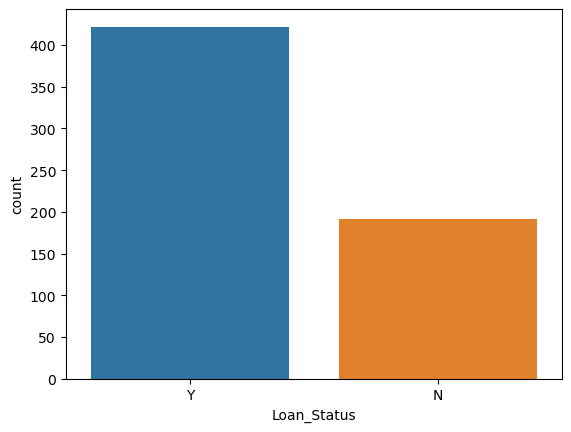

In [10]:
# visualization
sns.countplot(x='Loan_Status', data=loan_df)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

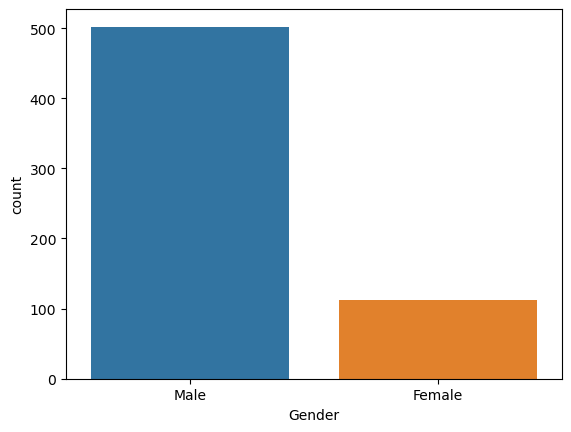

In [11]:
sns.countplot(x='Gender',data=loan_df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

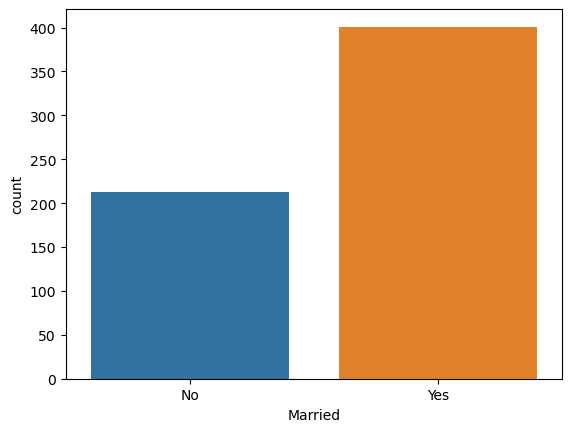

In [12]:
sns.countplot(x='Married',data=loan_df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

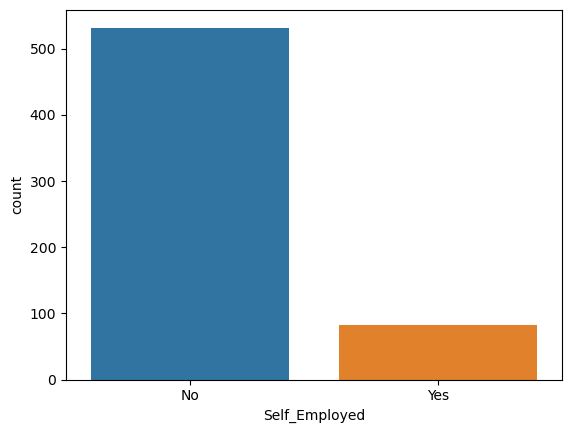

In [13]:
sns.countplot(x='Self_Employed',data=loan_df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

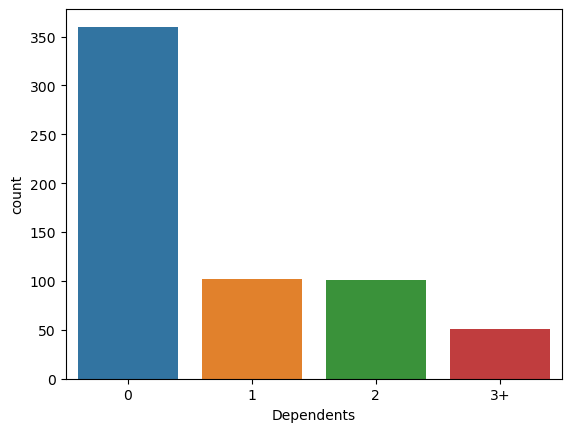

In [14]:
sns.countplot(x='Dependents',data=loan_df)
plt.show

In [15]:
loan_df['Total_Income']=loan_df['ApplicantIncome']+loan_df['CoapplicantIncome']
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [16]:
loan_df['ApplicantIncomelog']=np.log(loan_df['ApplicantIncome']+1)
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,7.972811
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,8.320448
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,8.996280
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,8.933796


In [17]:
loan_df['LoanAmountlog']=np.log(loan_df['LoanAmount']+1)
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog,LoanAmountlog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,7.972811,4.276666
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,8.320448,3.713572
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,8.996280,5.537334
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,8.933796,5.236442


In [18]:
loan_df['Loan_Amount_Term_log']=np.log(loan_df['Loan_Amount_Term']+1)
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,7.972811,4.276666,5.888878
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,8.320448,3.713572,5.198497
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,8.996280,5.537334,5.888878
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,8.933796,5.236442,5.888878


In [19]:
loan_df['Total_Income_log']=np.log(loan_df['Total_Income']+1)
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,7.972811,4.276666,5.888878,7.972811
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,8.320448,3.713572,5.198497,8.320448
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,8.996280,5.537334,5.888878,9.025576
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,8.933796,5.236442,5.888878,8.933796


In [20]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
loan_df=loan_df.drop(columns=cols,axis=1)
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [21]:
cols=['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for col in cols:
    loan_df[col]=le.fit_transform(loan_df[col])

In [22]:
loan_df.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,3,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,3,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,3,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,3,1,8.699681,4.955827,5.888878,8.699681


In [23]:
X=loan_df.drop(columns=['Loan_Status'],axis=1)
y=loan_df['Loan_Status']

In [24]:
#6. Divide the dataset into training and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
#7. Build the machine learning model which ever is suitable for the dataset
#8. Fit the model on the training dataset

model=RandomForestClassifier()
model.fit(X_train,y_train)
 

RandomForestClassifier()

In [26]:
#9. Test the model and find the accuracy of the model on the test and thetraining datasets

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [27]:
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 1.0
Test Accuracy: 0.7723577235772358


In [28]:
#10. Create a confusion matrix 
conf_matrix = confusion_matrix(y_test, model.predict(X_test))
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[18 25]
 [ 3 77]]


## CONCLUSIONS

### Training Accuracy: With a training accuracy of 100%, it indicates that the model has perfectly fit the training data. However, a training accuracy of 100% could also suggest potential overfitting, where the model has memorized the training data instead of learning the underlying patterns. This could potentially limit the model's ability to generalize to unseen data.

### Test Accuracy: The test accuracy of approximately 77.24% indicates that the model performs reasonably well on unseen data. It correctly predicts loan approval for about 77.24% of the instances in the test dataset

### While the model achieves a decent accuracy on the test dataset, further improvements may be possible to reduce false positives and false negatives, which are crucial in loan approval scenarios.Additional model evaluation techniques, such as precision, recall, and F1-score, could provide a more comprehensive understanding of the model's performance, especially in imbalanced datasets like loan approval data.

### confusion matrix:
### True Positives (TP): The model correctly predicted 77 instances where loans were approved.
### True Negatives (TN): The model correctly predicted 18 instances where loans were not approved.
### False Positives (FP): The model incorrectly predicted 25 instances as approved when they were not.
### False Negatives (FN): The model incorrectly predicted 3 instances as not approved when they were.

In [29]:

loan_df.to_excel('loan_df.xlsx', index=False)


In [30]:
from IPython.display import FileLink

FileLink('loan_df.xlsx')


C:\Users\USER\loan_df.xlsx